# Report

## Introduction

Understanding the various types of glass is crucial for numerous applications, from architectural design, container manufacturing to criminal investigation. Each glass type possesses unique characteristics based on its elemental composition and refractive index. This study will focus on identifying these glass types using a KNN model, considering different elements and variations in refractive index. Specifically, we explore float-processed glass, known for its economical production in flat glass manufacturing; container glass, used in various bottles and jars; tableware, which includes glass items for dining; and headlamp glass, vital in automotive safety.

**We want to answer the question of:**
How can we accurately predict the type of glass in an unknown sample using a KNN model trained on a dataset comprising refractive index and elemental compositions?

## Types of Glass:

Float-Processed Glass: Developed in the 1950s, it's pivotal in creating flat glass for vehicles and buildings. Key materials include silica, lime, soda, and cullet, heated to form molten glass, then floated on molten tin to achieve flatness​​.\
Container Glass: Encompasses glass bottles and jars for beverages, pharmaceuticals, cosmetics, and foods​​.\
Tableware: This category includes glassware for dining purposes, often made from glass, steel, or copper​​.\
Headlamp Glass: Essential in vehicles, headlamps provide illumination for safe driving and are distinct in their design and material requirements​​.

### Glass Dataset

The dataset comprises the refractive index and eight elemental compositions representing various glass types. It's essential to analyze these elements to identify patterns and correlations pertinent to different glass categories.

**Type of Glass** \
1 : Building Windows (float-processed) \
2 : Building Windows (non-float-processed) \
3 : Vehicle Windows (float-processed) \
4 : Vehicle Windows (non-float-processed) *none in this dataset* \
5 : Containers \
6 : Tableware \
7 : Headlamps 

Source: German,B.. (1987). Glass Identification. UCI Machine Learning Repository. https://doi.org/10.24432/C5WW2P.

### About the Data
The dataset from the UCI Machine Learning Repository, donated on August 31, 1987, by the USA Forensic Science Service, focuses on glass identification. It consists of 214 instances, each with 9 features, and is used for classification tasks in the fields of physics and chemistry.It is composed of the refractive index as well as eight different elements to represent the type of glass the combination of those elements and refractive index represent. 

The dataset includes various types of glass, defined by their oxide content such as sodium (Na), magnesium (Mg), aluminum (Al), silicon (Si), potassium (K), calcium (Ca), barium (Ba), and iron (Fe). Each instance has a unique ID number and a measure of refractive index (RI). The types of glass are categorized into seven classes: 1) building windows float processed, 2) building windows non-float processed, 3) vehicle windows float processed, 4) vehicle windows non-float processed (not included in the dataset), 5) containers, 6) tableware, and 7) headlamps.

Notably, the dataset does not contain data for category 4 (vehicle windows non-float processed)

## Methodology
### 1. A Classification Problem:

We recognize the question as a classification problem. The unknown needs to be predicted to be a class (a type). Our dataset consists of 7 types a long with a series of continuous variables describing the characteristics of said types. This scenario is fitting for a K-nearest neighbor Classification Model. 

### 2. Variable Selection:

The dataset comprises several continuous features: refractive index (RI), and weight percent of various oxides like Sodium (Na), Magnesium (Mg), Aluminum (Al), Silicon (Si), Potassium (K), Calcium (Ca), Barium (Ba), and Iron (Fe). Each of these elements contributes distinctively to the glass properties and thus, their inclusion is critical for accurate classification. The 'IdD' feature, which is merely an identifier with no intrinsic value to the glass properties, is excluded from the analysis. The selection of variables is based on their chemical significance in glass composition. Elements like Na, Mg, and Si are known to affect the physical and chemical properties of glass, making them key variables for prediction. The refractive index (RI) is a crucial optical property and can indicate glass type. \
Analysis of Variance: The variance of each variable across different glass types should be examined. Variables with higher variance are more likely to contribute to effective classification. \
Unique Distributions: Investigating the distribution of these elements across different glass types can reveal unique patterns, aiding in accurate classification.

### 3. KNN Model Development:

After our variable selection, we follow a series of steps to create our KNN Model. This includes balancing the dataset, standardizing the data, cross-validation and testing. 

We first clean up our data. This includes add labels to our table, removing the 'ID' variable which we have determined not to use, and turning our Type variable into a factor. 

Then, we split our dataset into training and testing data. 

From the summary table created for our dataset (Fig 3), we recognise that some class have less data than others. To prevent this from skewing our results, we use the function step_upsample to balance our dataset. This function duplicates values in classes that are unbalanced so that the dataset contains the same amount of data across every class. This will help our model be more accurate.  

Next, we standardize our data with step_scale(all_predictors()) and step_center(all_predictors()). A crucial part of how the KNN model function is determining the "nearest" data point to the unknown point with a distance equation. The general distance equations with *n* predictor variables is as follows: 
$$Distance = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2}$$ 
Because our variables span a large range, it is necessary to standardize them so that one variable does not skew the prediction too far off the accurate value. 

Following on, we cross validate different values of K to be able to determine that value of k that provides the best fitting model. This prevents overfitting, where the model is too influenced by the training data and therefore is not able to predict the testing data or new unknowns as accurately. 

Finally, we build the KNN Model with the best determined value of k. 

## Preliminary Data Analysis

In [1]:
#Load in necessary libraries

library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)
library("ggplot2")
install.packages("themis")
library(recipes)
library(modeldata)
library(themis)
install.packages("kknn")
library(kknn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

### 1. Acquire Data

In [2]:
# Read in data from URL and name collumns
names <- c("ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
glass <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"), header=FALSE)
colnames(glass) = names

# Data wrangling
glass <- glass |> select(-ID) |> mutate(Type = as_factor(Type))
glass
print("Fig 1. Original Dataset")

RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.52065,14.36,0,2.02,73.42,0,8.44,1.64,0,7
1.51651,14.38,0,1.94,73.61,0,8.48,1.57,0,7
1.51711,14.23,0,2.08,73.36,0,8.62,1.67,0,7


[1] "Fig 1. Original Dataset"


In [3]:
# Split data into training and testing data

set.seed(123)

glass_split <- initial_split(glass, prop = 0.75, strata = Type)
glass_train <- training(glass_split)
glass_test <- testing(glass_split)

### 2. Data Summary

In [4]:
#Summarize Data

#The mean value of each characteristic of each type of glass
print("Table of the mean of each variable")
glass_mean <- glass_train |>
    group_by(Type) |>
    summarize(across(everything(), mean))
glass_mean
print("Fig 2")

[1] "Table of the mean of each variable"


Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.518640,13.16960,3.5180000,1.163800,72.73260,0.4690000,8.780600,0.00220000,0.05600000
2,1.519059,13.10035,2.9312281,1.380175,72.52754,0.4908772,9.268070,0.06508772,0.07894737
3,1.517874,13.38545,3.5009091,1.245455,72.45182,0.4136364,8.723636,0.01363636,0.07909091
5,1.518928,12.82769,0.7738462,2.033846,72.36615,1.4700000,10.123846,0.18769231,0.06076923
6,1.516480,14.88667,1.5566667,1.410000,73.31333,0.0000000,8.723333,0.00000000,0.00000000
7,1.517327,14.39957,0.6786957,2.076087,72.93348,0.4065217,8.422174,1.00739130,0.01695652


[1] "Fig 2"


In [5]:
print("Count of how many obervations there are for each type of glass")
#Count of how many observations there are for each type of glass
glass_type <- glass_train |> count(Type)
glass_type
print("Fig 3")

[1] "Count of how many obervations there are for each type of glass"


Type,n
<fct>,<int>
1,50
2,57
3,11
5,13
6,6
7,23


[1] "Fig 3"


#### Insights:

Fig 2 is helpful to see the difference between each type of glass. The difference in magnitude of the values explains the need for us to standardize our data. \
Fig 3 highlights the discrepancies between the amount of data for each class. This is a problem highlighted in our Method section and we address later on in our code.  

### 3. Preliminary Visualization

[1] "Fig 5"


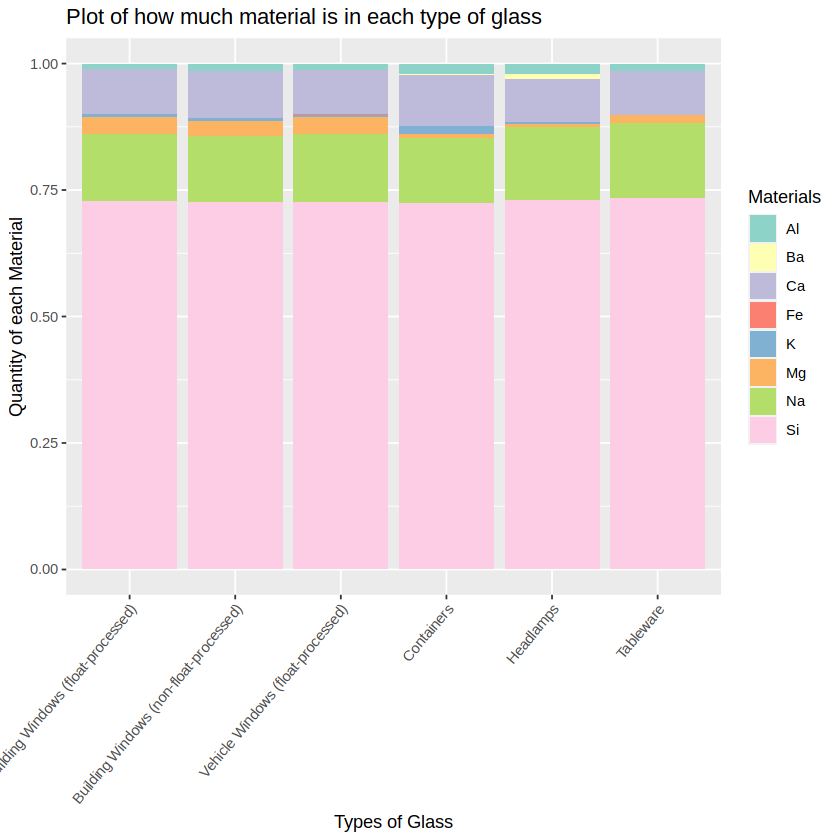

In [6]:
#Plot of how much material is in each type of glass

glass_chart_data <- glass_mean |> 
    select(-RI) |>
    pivot_longer(cols = c("Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"),
                names_to = "material",
                values_to = "amount") |>
    mutate(Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Headlamps")) |>
    mutate(Type = as.character(Type))

glass_bar <- ggplot(glass_chart_data, aes(x = Type, y = amount, fill = material)) +
                geom_bar(stat = "identity", position = "fill") +
                labs(x = "Types of Glass",
                    y = "Quantity of each Material",
                    fill = "Materials",
                    title = "Plot of how much material is in each type of glass") +
                scale_fill_brewer(palette = 'Set3') +
                theme(axis.text.x = element_text(angle = 50, hjust = 1))

glass_bar
print("Fig 5")

#### Insights:

From Fig 5, we can see the breakdown of the material composition of each type of glass. Notably, we see the most variations in Magnesium (Mg), Potassium (K), Calcium (Ca) and Sodium (Na). However, as seen from the table of means (Fig 2), we see there are variations in every element. We believe that using all the elemental make up of a glass will aid our model is making correct predictions.

[1] "Fig 4"


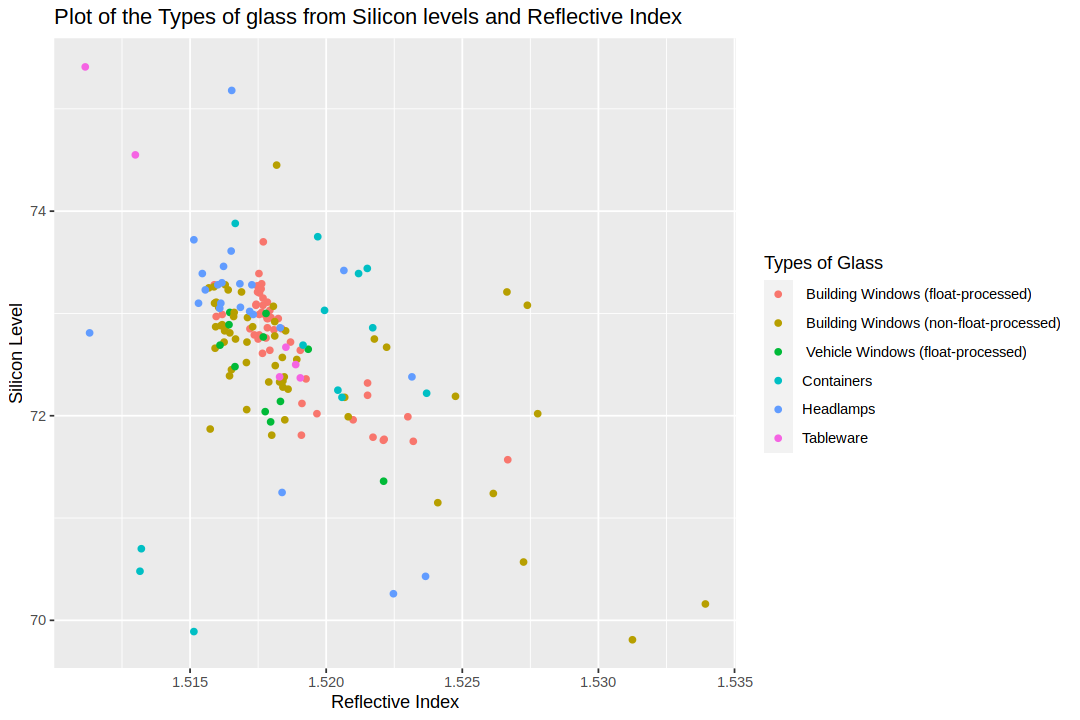

In [17]:
#Naming the Types of glass 
glass_name <- mutate(glass_train, Type = case_when(
    Type == 1 ~ " Building Windows (float-processed)",
    Type == 2 ~ " Building Windows (non-float-processed)",
    Type == 3 ~ " Vehicle Windows (float-processed)",
    Type == 4 ~ " Vehicle Windows (non-float-processed)",
    Type == 5 ~ "Containers",
    Type == 6 ~ "Tableware",
    Type == 7 ~ "Headlamps"))

#Plot of the Types of glass from Silicon levels and Reflective Index
options(repr.plot.width = 9, repr.plot.height = 6) 

ri_si_plot <- ggplot(glass_name, aes(x = RI, y = Si, group = Type)) +
    geom_point(aes(color = Type)) +
    labs(title = "Plot of the Types of glass from Silicon levels and Reflective Index", 
            x = "Reflective Index",
            y = "Silicon Level",
            color = "Types of Glass")

           
ri_si_plot
print("Fig 4")

#### Insights:

Reflective Index vs. Silicon Level: Understanding this relationship can shed light on the glass's optical properties. However, clarity on its significance in the prediction model is needed.\
Material Composition in Glass Types: Initial observations suggest uniform silicon levels across glass types, questioning its predictive value.
Glass Mean Table and Plot: Provides valuable insights into elemental composition variations across glass types. In-depth analysis under each plot will help in understanding its relevance to the study.

## Building the Model

### 1. Balaning the Dataset

In [26]:
# balance data set
set.seed(321)
ups_recipe <- recipe(Type ~ ., data = glass_train) |>
    step_upsample(Type, over_ratio = 1, skip = FALSE) |>
    prep() 

ups_glass_train <- bake(ups_recipe, glass_train)


### 2. Finding the best k

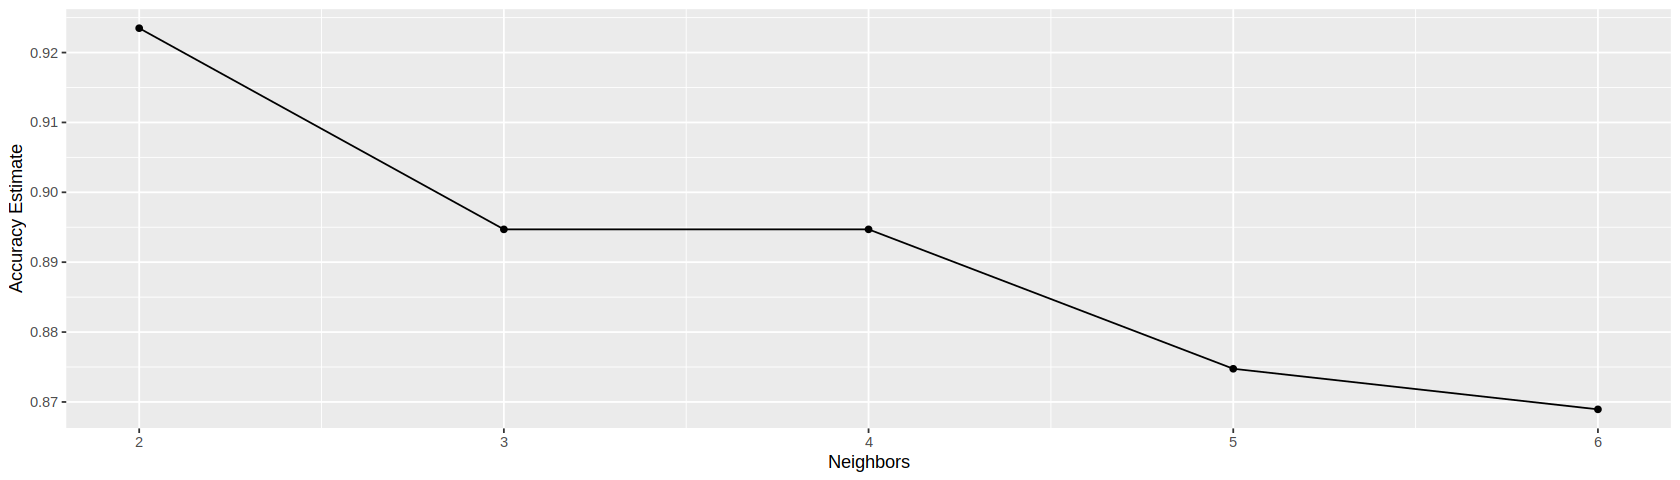

In [27]:
# Finding the best k value
library(themis)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")


knn_recipe <- recipe(Type ~., data = ups_glass_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_vfold <- vfold_cv(ups_glass_train, v = 5, strata = Type)

knn_results <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = knn_vfold, grid = tibble(neighbors = c(2, 3, 4, 5, 6))) |>
    collect_metrics()

accuracies <- knn_results |>
    filter(.metric == 'accuracy')

cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors",
        y = "Accuracy Estimate")

cross_val_plot

#### Insights

From the cross-evaluation plot above, k = 2 provides the most accurate predictions. Hence, we will use k = 2 in our model.

### 3. Building the Model

In [ ]:
# Building the model
set.seed(321)

glass_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_fit <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(glass_spec) |>
    fit(data = ups_glass_train)

### 4. Testing Model

In [ ]:
# Testing it and finding the accuracy

set.seed(321)

glass_predictions <- knn_fit |>
    predict(glass_test) |>
    bind_cols(glass_test)

prediction_metrics <- glass_predictions |>
    metrics(truth = Type, estimate = .pred_class) |>
    filter(.metric == "accuracy")

glass_conf_mat <- glass_predictions |>
    conf_mat(truth = Type, estimate = .pred_class)

prediction_metrics
glass_conf_mat



## Discussion

stuff

## Reference